<a href="https://colab.research.google.com/github/Schiessl/AgoraVAI/blob/main/Acesso_aos_Dados_do_BC_v1_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Dados do Banco Central do Brasil - BC

###Instalar pacotes

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


#Código no Banco Central do Brasil - BC
link para acesso: https://www3.bcb.gov.br/sgspub/localizarseries/localizarSeries.do?method=prepararTelaLocalizarSeries
SGS - Sistema Gerenciador de Séries Temporais - v2.1

*   1 - Taxa de câmbio - Livre - Dólar americano (venda) - diário 	u.m.c./US$ 	- D - 28/11/1984 até hoje
*   11 - Taxa de juros - Selic	% a.d.	D	04/06/1986 até hoje
*   432 - Taxa de juros - Meta Selic definida pelo Copom -	% a.a.	- D	- 05/03/1999	até hoje
*   433 - Índice nacional de preços ao consumidor-amplo (IPCA) - Var. % mensal - M - jan/1980	até o mais atual
*   189 - Índice geral de preços do mercado (IGP-M) - Var. % mensal - M - 30/06/1989 até o mais atual

A SELIC (Sistema Especial de Liquidação e Custódia) é a taxa básica de juros da economia brasileira, determinada pelo Banco Central do Brasil. Existem dois conceitos principais relacionados à SELIC: a SELIC meta e a SELIC efetiva.

1. **SELIC Meta**: É a taxa estabelecida pelo Comitê de Política Monetária (COPOM) do Banco Central como a meta para a taxa SELIC em um determinado período. O COPOM se reúne periodicamente para definir a meta da taxa SELIC com base nas condições econômicas e nas metas de inflação estabelecidas pelo governo. A SELIC meta é utilizada como referência para o controle da inflação e como instrumento de política monetária para influenciar a atividade econômica.

2. **SELIC Efetiva**: É a taxa real praticada no mercado, ou seja, a taxa pela qual as instituições financeiras emprestam dinheiro umas para as outras em operações lastreadas em títulos públicos federais negociados no SELIC. A SELIC efetiva pode variar em torno da SELIC meta devido a diversos fatores, como oferta e demanda por crédito, condições de liquidez do mercado financeiro e expectativas econômicas.

Em resumo, enquanto a SELIC meta é a taxa estabelecida pelo Banco Central como objetivo a ser atingido, a SELIC efetiva é a taxa real praticada no mercado financeiro, podendo variar em relação à meta devido a condições de mercado e outras variáveis econômicas.

In [ ]:
def get_bcb_data(codigo_serie, data_inicial, data_final, nome_serie=None):
    """
    Obtém dados de uma série temporal específica da API do Banco Central do Brasil.

    Parâmetros:
        codigo_serie (int): O código da série temporal desejada.
        data_inicial (str): A data inicial no formato 'dd/mm/aaaa'.
        data_final (str): A data final no formato 'dd/mm/aaaa'.
        nome_serie (str): O nome para o valor da série temporal. Se não for fornecido, o valor padrão será 'valor'.

    Retorna:
        dict or None: Um dicionário contendo os dados da série temporal no formato JSON, se a solicitação for bem-sucedida. Retorna None em caso de erro na solicitação.

    Exemplo de utilização:
        data = get_bcb_data(11, '01/01/2022', '31/12/2022', nome_serie='SELIC Meta')
    """
    url = f'https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}'
    response = requests.get(url)
    if response.status_code == 200:
        dados = response.json()
        if nome_serie:
            for entrada in dados:
                entrada[nome_serie] = entrada.pop('valor')
                # Convertendo a data para o formato 'yyyy-mm-dd'
                entrada['data'] = datetime.strptime(entrada['data'], '%d/%m/%Y').strftime('%Y-%m-%d')
        return dados
    else:
        print("Erro ao obter dados:", response.status_code)
        return None

# Exemplo de utilização: Baixando a taxa de câmbio USD/BRL
codigo_serie = 433  # Código da série temporal
nome_serie = 'IPCA'  # Nome para o valor da série temporal
data_inicial = '01/01/2019'  # Data inicial
data_final = '31/12/2024'  # Data final

data = get_bcb_data(codigo_serie, data_inicial, data_final, nome_serie)
# (data)


In [ ]:
df = pd.DataFrame(data)
df.set_index('data', inplace=True)
df


,IPCA
data,
2019-01-01,0.32
2019-02-01,0.43
2019-03-01,0.75
2019-04-01,0.57
2019-05-01,0.13
...,...
2023-09-01,0.26
2023-10-01,0.24
2023-11-01,0.28


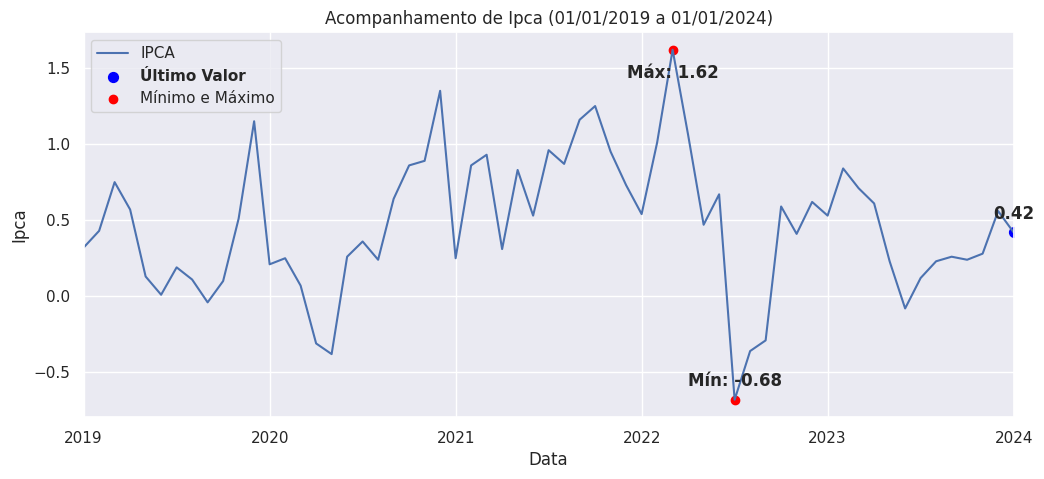

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plotar_grafico(df, posicao_legenda='upper left'):
    """
    Plota um gráfico com os dados fornecidos em um DataFrame, mostrando os pontos de mínimo, máximo e último em negrito na legenda.

    Parâmetros:
        df (DataFrame): O DataFrame contendo os dados a serem plotados. Deve ter um índice de data/hora e uma coluna numérica.
        posicao_legenda (str): A posição desejada para o quadro da legenda. Pode ser 'upper left' (padrão) ou 'upper right'.

    Retorna:
        None

    Exemplo de utilização:
        plotar_grafico(df, posicao_legenda='upper right')
    """
    # Convertendo o índice para o formato de data
    df.index = pd.to_datetime(df.index)

    # Convertendo o tipo de dados do outro campo para numérico
    df[df.columns[0]] = pd.to_numeric(df[df.columns[0]], errors='coerce')

    # Configurações do Seaborn
    sns.set_theme()

    # Nome da segunda coluna (coluna que está sendo plotada)
    indicador = df.columns[0]

    # Data inicial e data final
    data_inicio = df.index.min().strftime('%d/%m/%Y')
    data_fim = df.index.max().strftime('%d/%m/%Y')

    # Configurações do gráfico
    ax = df[indicador].plot(figsize=(12, 5))
    plt.title(f'Acompanhamento de {indicador.capitalize()} ({data_inicio} a {data_fim})')
    plt.xlabel('Data')
    plt.ylabel(indicador.capitalize())

    # Adicionar ponto preto no último valor
    ultimo_valor = df[indicador].iloc[-1]
    ultimo_ponto = df.index[-1]
    ax.scatter(ultimo_ponto, ultimo_valor, color='blue', s=50, label='Último Valor')
    ax.annotate(f'{ultimo_valor:.2f}', (ultimo_ponto, ultimo_valor), textcoords='offset points', xytext=(0, 10), ha='center', fontweight='bold')

    # Encontrar pontos de mínimo e máximo
    minimo = df[indicador].idxmin()
    maximo = df[indicador].idxmax()

    # Adicionar marcadores para os pontos de mínimo e máximo
    ax.scatter([minimo, maximo], [df[indicador][minimo], df[indicador][maximo]], color='red', marker='o', label='Mínimo e Máximo')
    ax.annotate(f'Mín: {df[indicador][minimo]:.2f}', (minimo, df[indicador][minimo]), textcoords='offset points', xytext=(0, 10), ha='center', fontweight='bold')
    ax.annotate(f'Máx: {df[indicador][maximo]:.2f}', (maximo, df[indicador][maximo]), textcoords='offset points', xytext=(0, -20), ha='center', fontweight='bold')

    # Colocar a legenda dentro do gráfico
    legenda = ax.legend(loc=posicao_legenda)
    for texto_legenda in legenda.get_texts():
        if texto_legenda.get_text().startswith('Mín:') or texto_legenda.get_text().startswith('Máx:') or texto_legenda.get_text().startswith('Último'):
            texto_legenda.set_fontweight('bold')

    # Mostrar o gráfico
    plt.show()

# Exemplo de utilização
# posições da legenda: upper left, lower left, upper right, lower right
plotar_grafico(df, posicao_legenda='upper left')
